### We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline
print('Done installing all the module needed for this project:')

Done installing all the module needed for this project:


### Lets download the dataset

In [6]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-01-01 07:20:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2021-01-01 07:20:05 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data from the CSV file using pandas, to create Dataframe.

In [86]:
df=pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### lets print the dimension of the loaded dataset.

In [87]:
df.shape

(346, 10)

In [88]:
df['due_date']

0       10/7/2016
1       10/7/2016
2       9/22/2016
3       10/8/2016
4       10/8/2016
          ...    
341     9/25/2016
342    10/10/2016
343     9/26/2016
344    11/10/2016
345    10/11/2016
Name: due_date, Length: 346, dtype: object

### Converting to Date Time Object.

In [89]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data Visualisation And PreProcessing.

### Checking the unique value counts of loan_status.

In [90]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

#### It seems that 260 individual have already paid off the loan, but 86 individual have gone to collection.

In [91]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [92]:
import seaborn as sns
print('Seaborn library  imported sucessfully;')

Seaborn library  imported sucessfully;


### Linspace in python create a range of number accroding to user input, where the difference between the numbers are same.

In [93]:
bins=np.linspace(df.Principal.min(),df.Principal.max(),10)
bins

array([ 300.        ,  377.77777778,  455.55555556,  533.33333333,
        611.11111111,  688.88888889,  766.66666667,  844.44444444,
        922.22222222, 1000.        ])

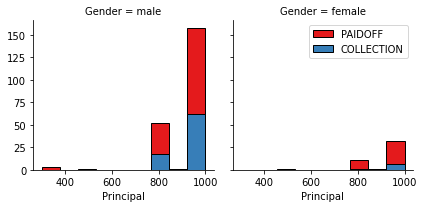

In [94]:
bins=np.linspace(df.Principal.min(),df.Principal.max(),10)
g=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
g.map(plt.hist,'Principal',bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

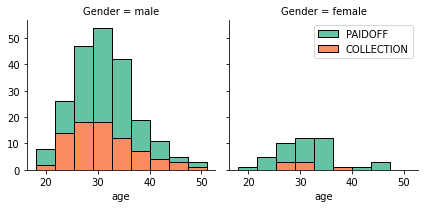

In [95]:
bins=np.linspace(df.age.min(),df.age.max(),10)
g=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set2',col_wrap=2)
g.map(plt.hist,'age',bins=bins,ec='k')
g.axes[-1].legend()
plt.show()

# Time For Preprocessing: Feature Selection/Extraction.

### Lets check on which day of Weekend people get their loan sanctioned.

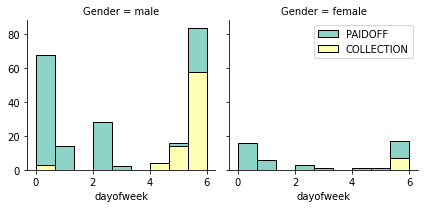

In [96]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(),df.dayofweek.max(),10)
g=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set3', col_wrap=2)
g.map(plt.hist,'dayofweek',bins=bins,ec='k')
g.axes[-1].legend()
plt.show()

### We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4

In [97]:
df['weekend']=df['dayofweek'].apply(lambda x: 1 if(x>3) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


### Convert Categorical features to numerical values

In [98]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=False)

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

In [99]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

### 86% female pay there loan while 73% of male pay there loan.

### lets convert categorical value to numerical value, for example male to 0 and female to 1:

In [100]:
df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


### Lets see for eductaion.

In [101]:
df.groupby('education')['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

### Feature before Encoding.

In [102]:
df[['Principal','Gender','terms','age','education']].head()

,Principal,Gender,terms,age,education
0,1000,0,30,45,High School or Below
1,1000,1,30,33,Bechalor
2,1000,0,15,27,college
3,1000,1,30,28,college
4,1000,0,30,29,college


### Now converting the education data frame separately to each binary variables and append them in the dataframe.

In [104]:
Feature = df[['Principal','Gender','terms','age','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])],axis=1)
Feature.drop(['Master or Above'],axis=1,inplace=True)
Feature.head()

,Principal,Gender,terms,age,weekend,Bechalor,High School or Below,college
0,1000,0,30,45,0,0,1,0
1,1000,1,30,33,0,1,0,0
2,1000,0,15,27,0,0,0,1
3,1000,1,30,28,1,0,0,1
4,1000,0,30,29,1,0,0,1


In [106]:
X=Feature
X[:10]

,Principal,Gender,terms,age,weekend,Bechalor,High School or Below,college
0,1000,0,30,45,0,0,1,0
1,1000,1,30,33,0,1,0,0
2,1000,0,15,27,0,0,0,1
3,1000,1,30,28,1,0,0,1
4,1000,0,30,29,1,0,0,1
5,1000,0,30,36,1,0,0,1
6,1000,0,30,28,1,0,0,1
7,800,0,15,26,1,0,0,1
8,300,0,7,29,1,0,0,1
9,1000,0,15,39,1,0,1,0


In [111]:
Y=df['loan_status'].values
Y[:10]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

# Normalising the Data:

In [112]:
X=preprocessing.StandardScaler().fit_transform(X)
X[:10]

array([[ 0.51578458, -0.42056004,  0.92071769,  2.33152555, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  2.37778177,  0.92071769,  0.34170148, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.42056004, -0.95911111, -0.65321055, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  2.37778177,  0.92071769, -0.48739188,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458, -0.42056004,  0.92071769, -0.3215732 ,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458, -0.42056004,  0.92071769,  0.8391575 ,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458, -0.42056004,  0.92071769, -0.48739188,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.42056004, -0.95911111, -0.81902922,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-5.89052444, -0.42056004

# Classification:

## Lets First Use K Nearest Neighbor(KNN)

In [113]:
from sklearn.model_selection import train_test_split
print('Done')

Done


In [116]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)
print('Train Set: ',X_train.shape,Y_train.shape)
print('Test Set: ',X_test.shape,Y_test.shape)

Train Set:  (242, 8) (242,)
Test Set:  (104, 8) (104,)


In [117]:
from sklearn.neighbors import KNeighborsClassifier
print('Done importing KNN algorithm')

Done importing KNN algorithm


In [121]:
# Lets define the value of K for the kNN classsification, Here i Have selecetd value of K to be 5.
k = 5
neighk6=KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)
yhat=neighk6.predict(X_test)
yhat[:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [125]:
Y_test[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [128]:
from sklearn import metrics
print('Train set Accuracy: ',metrics.accuracy_score(Y_train,neighk6.predict(X_train)))
print('Tets set Accuracy: ',metrics.accuracy_score(Y_test,neighk6.predict(X_test)))


Train set Accuracy:  0.8057851239669421
Tets set Accuracy:  0.7307692307692307


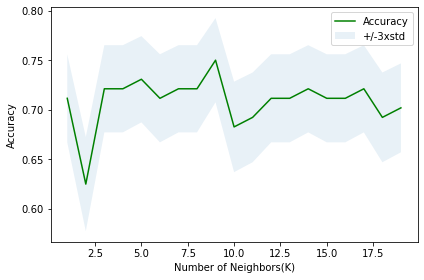

Best Accuracy: 0.75 K= 9


In [136]:
ks=20
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
ConfusionMX=[];
for i in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[i-1]=metrics.accuracy_score(Y_test,yhat)
    std_acc[i-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy','+/-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors(K)')
plt.tight_layout()
plt.show()
print('Best Accuracy:',mean_acc.max(),'K=',mean_acc.argmax()+1)